<center><h1> Walmart Sales Forecasting </h1></center>

<img src='sales_forecasting_banner.jpg' width='500' height='500' />

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
from xgboost import XGBRegressor

In [15]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [16]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

**features.csv** :
   - This file contains additional data related to the store, department, and regional activity for the given dates. 
   
   - It contains the following fields:
       - Store - the store number
       - Date - the week
       - Temperature - average temperature in the region
       - Fuel_Price - cost of fuel in the region
       - MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
        - CPI - the consumer price index
        - Unemployment - the unemployment rate
        - IsHoliday - whether the week is a special holiday week

The consumer price index (CPI) measures changes over time in the general level of prices of goods and services that a reference population acquires, uses or pays for consumption

In [17]:
feat_data = pd.read_csv('features.csv')
feat_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [18]:
feat_data.shape

(8190, 12)

In [19]:
feat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [20]:
feat_data['Date'] = pd.to_datetime(feat_data['Date'])

In [21]:
feat_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [22]:
feat_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [23]:
feat_data['CPI'] = feat_data['CPI'].fillna(np.mean(feat_data['CPI']))

In [24]:
feat_data['Unemployment'] = feat_data['Unemployment'].fillna(np.mean(feat_data['Unemployment']))

In [25]:
feat_data['MarkDown1'] = feat_data['MarkDown1'].fillna(0)
feat_data['MarkDown2'] = feat_data['MarkDown2'].fillna(0)
feat_data['MarkDown3'] = feat_data['MarkDown3'].fillna(0)
feat_data['MarkDown4'] = feat_data['MarkDown4'].fillna(0)
feat_data['MarkDown5'] = feat_data['MarkDown5'].fillna(0)

In [26]:
feat_data.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

**stores.csv** :
 - This file contains anonymized information about the 45 stores, indicating the type and size of store.

In [27]:
stores_data = pd.read_csv('stores.csv')
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [28]:
stores_data.shape

(45, 3)

In [29]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [30]:
stores_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


In [31]:
stores_data.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

**train.csv** :
   - This is the historical training data, which covers to 2010-02-05 to 2012-11-01. 
   
   - Within this file you will find the following fields:
       - Store - the store number
       - Dept - the department number
       - Date - the week
       - Weekly_Sales -  sales for the given department in the given store
       - IsHoliday - whether the week is a special holiday week

In [32]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [33]:
train_data.shape

(421570, 5)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [35]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [36]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [37]:
train_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [38]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [40]:
test_data['Date'] = pd.to_datetime(test_data['Date'])

In [41]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,115064.0,22.238207,12.80993,1.0,11.0,22.0,33.0,45.0
Dept,115064.0,44.339524,30.65641,1.0,18.0,37.0,74.0,99.0


In [42]:
test_data.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

## EDA

**1**. `Visualizing the Type of the Stores along with their percentage`

In [43]:
stores_data['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

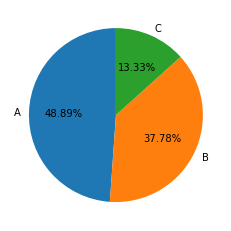

In [44]:
type_feat = stores_data['Type'].value_counts()
plt.pie( 
         x = type_feat ,
         labels = type_feat.index ,
         autopct = '%.2f%%',
         startangle=90
       );

<AxesSubplot:xlabel='Type', ylabel='Size'>

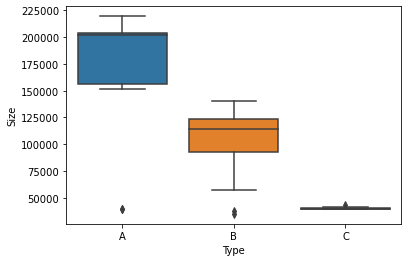

In [45]:
sns.boxplot(x='Type', y='Size', data=stores_data)

**2**. `Features and Stores have 'Store' as a common column lets merge the data`

In [47]:
data = feat_data.merge(stores_data ,how='inner' ,on='Store')
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,8190.0,3462.090725,7388.916286,-2781.450,0.000000,0.000000,4639.585000,103184.980000
MarkDown2,8190.0,1206.981664,5495.556015,-265.760,0.000000,0.000000,98.590000,104519.540000
MarkDown3,8190.0,776.464219,7539.953758,-179.260,0.000000,0.000000,24.220000,149483.310000
MarkDown4,8190.0,1392.763115,4707.111488,0.000,0.000000,0.000000,774.692500,67474.850000
MarkDown5,8190.0,2043.403725,9431.223215,-185.170,0.000000,0.000000,2680.295000,771448.100000
CPI,8190.0,172.460809,38.292649,126.064,132.653774,172.460809,212.766994,228.976456
Unemployment,8190.0,7.826821,1.808963,3.684,6.833000,7.826821,8.519000,14.313000


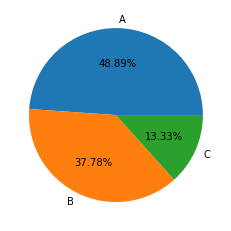

In [50]:
type_feat = data['Type'].value_counts()
plt.pie( 
         x = type_feat ,
         labels = type_feat.index ,
         autopct = '%.2f%%',
       );

**3**. `Top 10 Department in train dataset with their percentage`

In [51]:
train_data['Dept'].value_counts()[:10]

1     6435
10    6435
38    6435
21    6435
67    6435
16    6435
14    6435
13    6435
79    6435
81    6435
Name: Dept, dtype: int64

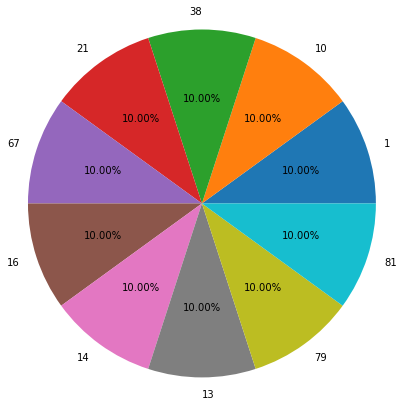

In [52]:
dept_feat = train_data['Dept'].value_counts()[:10]
plt.pie( 
         x = dept_feat ,
         labels = dept_feat.index ,
         autopct = '%.2f%%',
         radius=2
       );

**4**. `Top 10 Stores in train dataset with their percentage`

In [53]:
train_data['Store'].value_counts()[:10]

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
Name: Store, dtype: int64

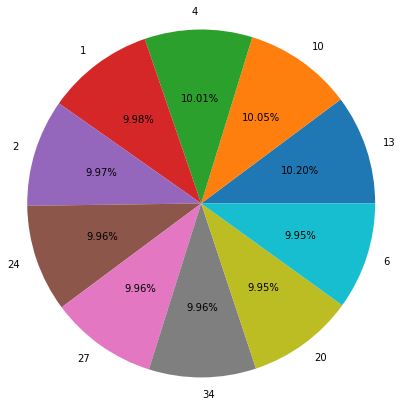

In [54]:
store_feat = train_data['Store'].value_counts()[:10]
plt.pie( 
         x = store_feat ,
         labels = store_feat.index ,
         autopct = '%.2f%%',
         radius=2
       );

**4**. `Visualize IsHoliday`

In [55]:
train_data['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

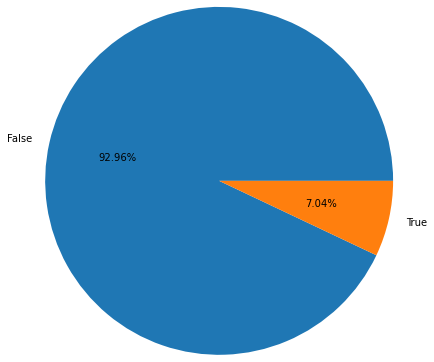

In [56]:
holi_feat = train_data['IsHoliday'].value_counts()
plt.pie( 
         x = holi_feat ,
         labels = holi_feat.index ,
         autopct = '%.2f%%',
         radius=2
       );

**5**. `Add New Features`

In [57]:
data['Week'] = data['Date'].dt.week
data['Year'] = data['Date'].dt.year

data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315,9,2010


In [58]:
train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [59]:
data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Week', 'Year'],
      dtype='object')

**6**. `Merge data with train_data and test_data`

In [60]:
train_data = train_data.merge(
                               data ,
                               how='inner' ,
                               on = ['Store','Date','IsHoliday']
                             )
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010


In [61]:
test_data = test_data.merge(
                               data ,
                               how='inner' ,
                               on = ['Store','Date','IsHoliday']
                             )
test_data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,2012
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,2012
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,2012
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,2012
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,2012


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

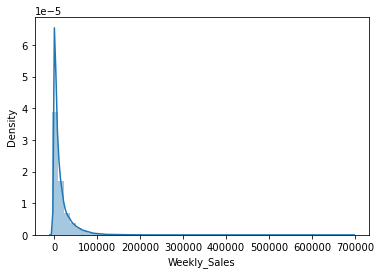

In [62]:
sns.distplot(train_data['Weekly_Sales'])

**7**. `Average Weekly Sales for the year 2010`

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

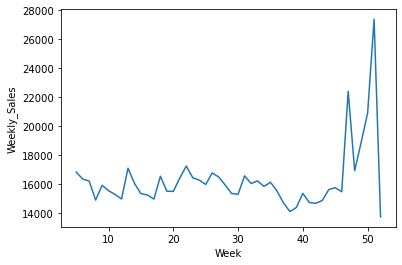

In [63]:
weekly_sales_2010 = train_data[ train_data['Year']==2010 ]['Weekly_Sales']
weekly_sales_2010 = weekly_sales_2010.groupby(train_data['Week']).mean()

sns.lineplot( weekly_sales_2010.index , weekly_sales_2010)

**8**. `Average Weekly Sales for the year 2011`

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

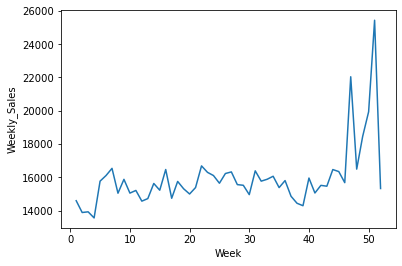

In [64]:
weekly_sales_2011 = train_data[ train_data['Year']==2011 ]['Weekly_Sales']
weekly_sales_2011 = weekly_sales_2011.groupby(train_data['Week']).mean()

sns.lineplot( weekly_sales_2011.index , weekly_sales_2011)

**9**. `Average Weekly Sales for the year 2012`

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

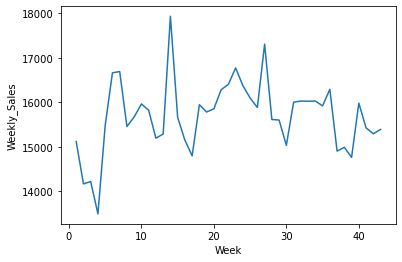

In [65]:
weekly_sales_2012 = train_data[ train_data['Year']==2012 ]['Weekly_Sales']
weekly_sales_2012 = weekly_sales_2012.groupby(train_data['Week']).mean()

sns.lineplot( weekly_sales_2012.index , weekly_sales_2012)

**10**. `Combined Sales`

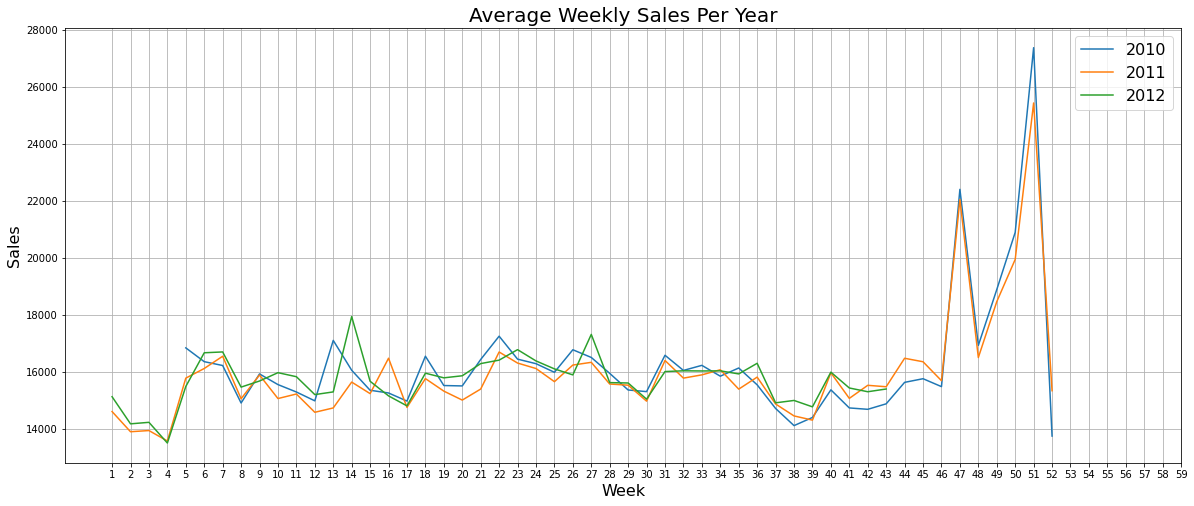

In [66]:
plt.figure(figsize=(20,8))

sns.lineplot( weekly_sales_2010.index , weekly_sales_2010 )
sns.lineplot( weekly_sales_2011.index , weekly_sales_2011)
sns.lineplot( weekly_sales_2012.index , weekly_sales_2012)

plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)

plt.xticks(np.arange(1,60, step=1))

plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)

plt.title('Average Weekly Sales Per Year', fontsize=20)

plt.grid()

**11**. `Average Sales per Department`

In [67]:
weekly_sales = train_data['Weekly_Sales'].groupby(train_data['Dept']).mean()

Text(0.5, 1.0, 'Average Sales per Department')

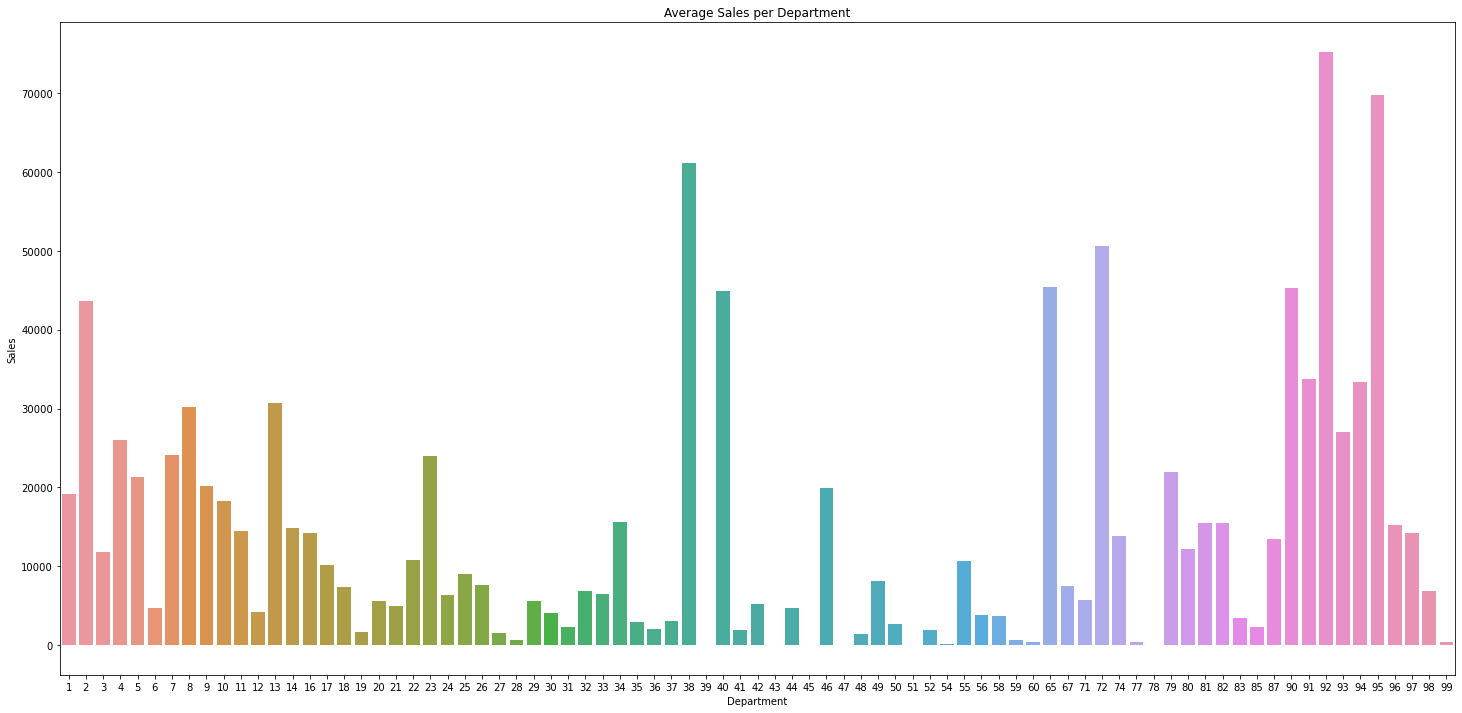

In [68]:
plt.figure(figsize=(25,12))

sns.barplot(weekly_sales.index, weekly_sales)

plt.xlabel('Department')
plt.ylabel('Sales')

plt.title('Average Sales per Department')

**12**. `Average Sales per Store`

In [69]:
store_sales = train_data['Weekly_Sales'].groupby(train_data['Store']).mean()

Text(0.5, 1.0, 'Average Sales per Store')

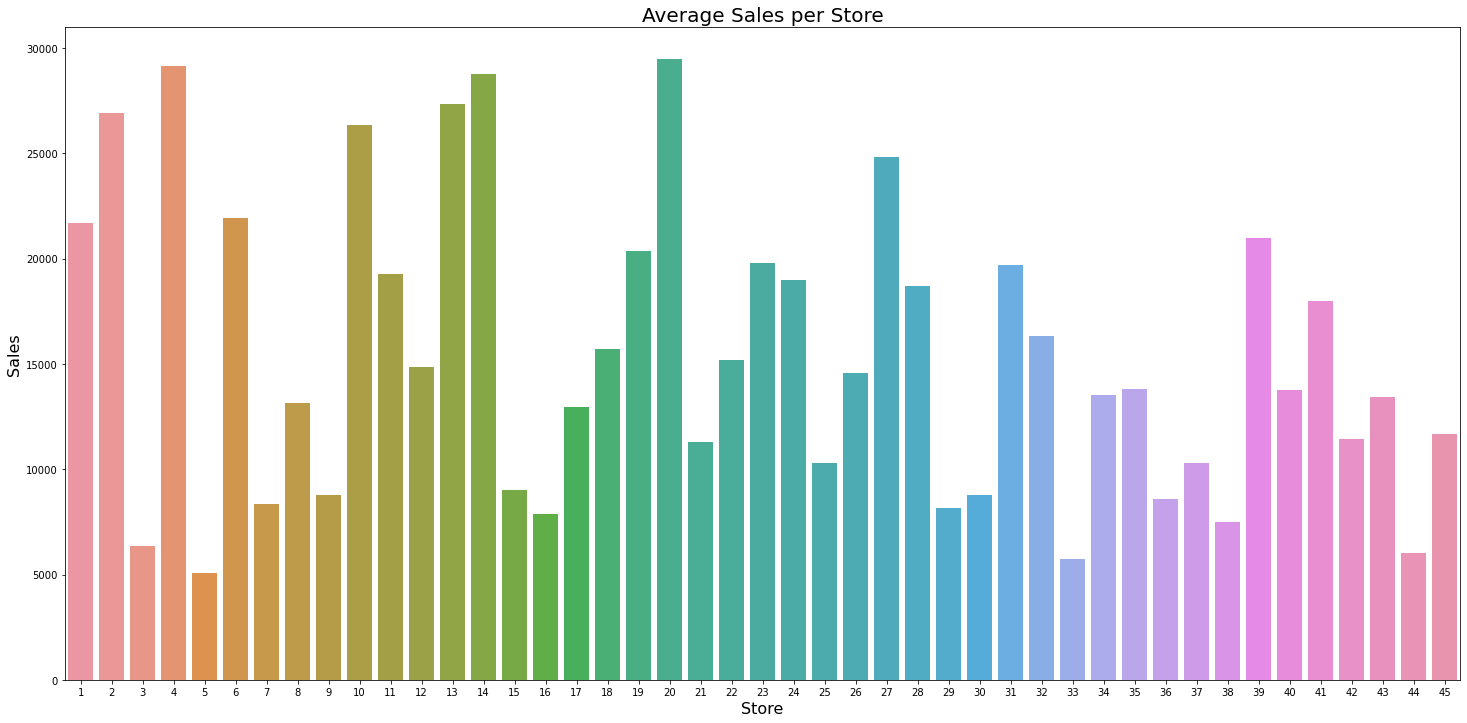

In [70]:
plt.figure(figsize=(25,12))

sns.barplot(store_sales.index, store_sales)

plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)

plt.title('Average Sales per Store', fontsize=20)

**13**. `Correlation`

**np.triu**:
- Upper triangle of an array.

**np.ones_like**:
 - Return an array of ones with the same shape and type as a given array.

In [71]:
corr_mat = train_data.corr()
corr_mat

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Year
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.182881,0.001031,0.002997
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,-0.002966,0.000882,0.003738
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,0.243828,0.027673,-0.010111
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,0.010460,0.000593,0.128184,-0.056746
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.058313,0.236276,0.065814
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,0.003361,-0.031140,0.779633
MarkDown1,-0.059844,0.001494,0.047172,-0.003521,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,0.169788,-0.093572,0.501044
MarkDown2,-0.033829,0.000587,0.020716,0.207604,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.078372,-0.012812,0.131867
MarkDown3,-0.020331,0.001475,0.038562,0.266471,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.033641,0.122323,0.006789
MarkDown4,-0.042724,0.001937,0.037467,0.011565,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,0.127334,-0.114168,0.335340


In [72]:
mask= np.triu(np.ones_like(corr_mat, dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  Tru

<AxesSubplot:title={'center':'Correlation Matrix'}>

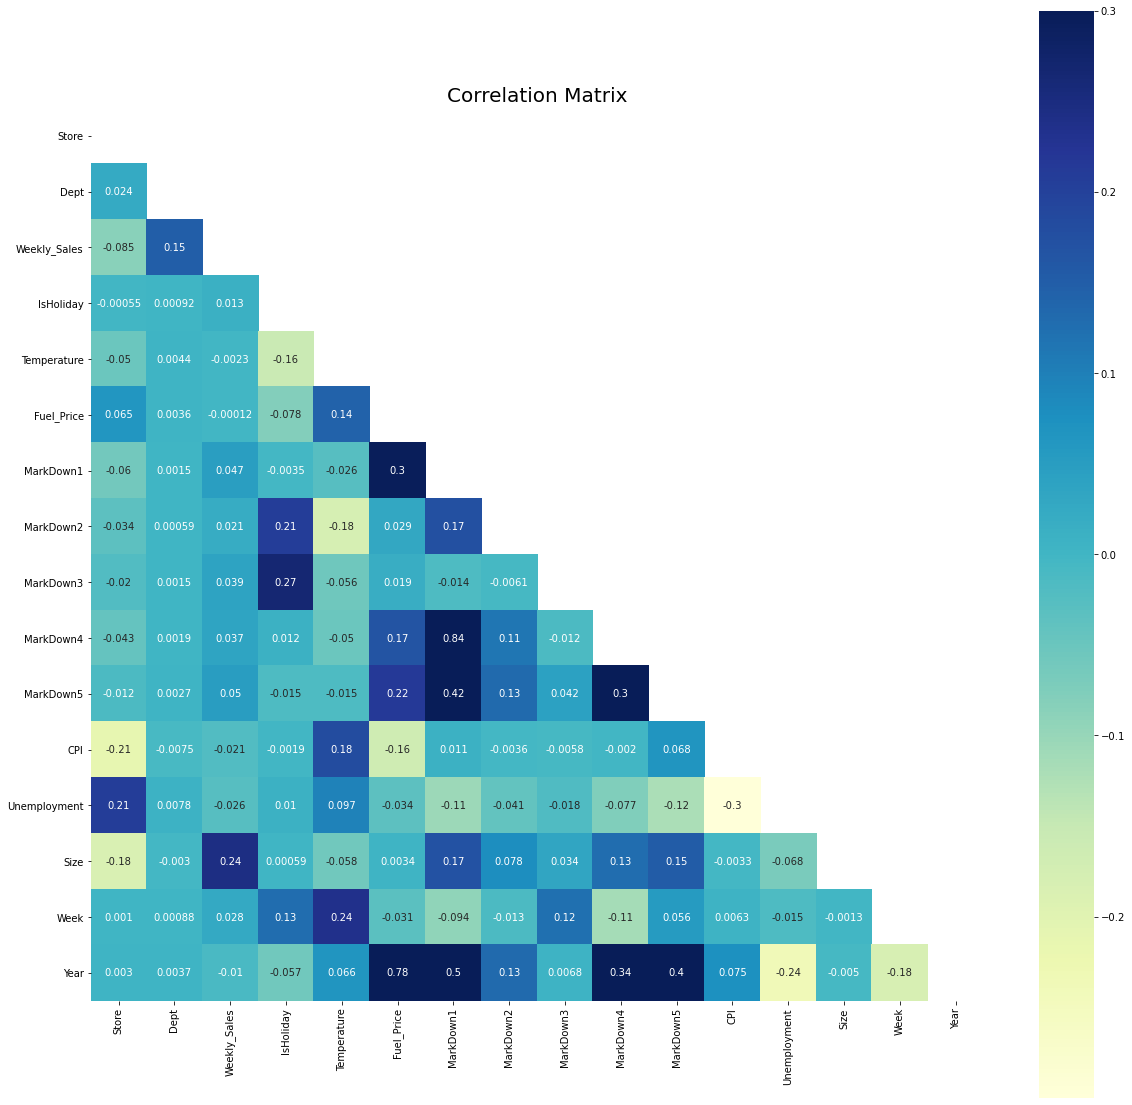

In [73]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', fontsize=20)

sns.heatmap(
             corr_mat          ,
             mask   = mask     ,
             annot  = True     ,
             cmap   = "YlGnBu" , 
             vmax   = .3       , 
             center = 0        ,
             square = True
           )

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Type'>

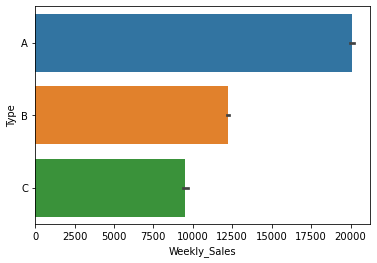

In [74]:
sns.barplot(x=train_data["Weekly_Sales"],y=train_data["Type"])

## Outlier Treatment

<AxesSubplot:ylabel='Frequency'>

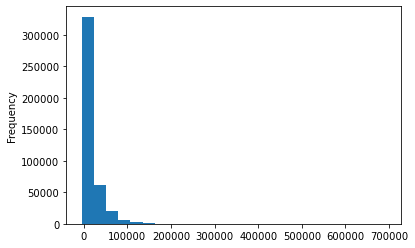

In [75]:
train_data["Weekly_Sales"].plot.hist(bins=25)

In [76]:
train_data["Weekly_Sales"].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [77]:
train_data["Weekly_Sales"] = np.where(train_data["Weekly_Sales"]>100000 ,100000 ,train_data["Weekly_Sales"])

<AxesSubplot:ylabel='Frequency'>

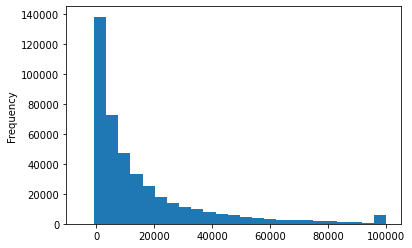

In [78]:
train_data["Weekly_Sales"].plot.hist(bins=25)

## Feature Extraction

In [79]:
train_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Year            0
dtype: int64

In [80]:
train_data['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [81]:
type_mapping = {'A':1 ,'B':2 ,'C':3}
train_data['Type'] = train_data['Type'].apply(lambda x:type_mapping[x])

In [82]:
train_data['Type'].value_counts()

1    215478
2    163495
3     42597
Name: Type, dtype: int64

In [83]:
train_data['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [84]:
IsHoliday_mapping = {False: 0, True: 1}
train_data['IsHoliday'] = train_data['IsHoliday'].apply(lambda x:IsHoliday_mapping[x])

In [85]:
train_data['IsHoliday'].value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

## Feature Selection

In [86]:
train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year'],
      dtype='object')

In [87]:
train_data = train_data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Fuel_Price','Temperature','Date'],axis=1)

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   CPI           421570 non-null  float64
 5   Unemployment  421570 non-null  float64
 6   Type          421570 non-null  int64  
 7   Size          421570 non-null  int64  
 8   Week          421570 non-null  int64  
 9   Year          421570 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 55.4 MB


In [89]:
X = train_data.drop(['Weekly_Sales'],axis=1)
y = train_data['Weekly_Sales']

In [90]:
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [91]:
sc = StandardScaler()

In [92]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

## Model

**1**. `Linear Regression`

In [93]:
lr = LinearRegression()

In [94]:
lr.fit(X_train ,y_train)

LinearRegression()

In [95]:
lr_pred = lr.predict(X_test)

In [96]:
lr_score = lr.score(X_test ,y_test)
lr_score

0.0881685054798701

In [97]:
lr_mae = mae(y_test ,lr_pred)
lr_mae

14014.893546471554

In [98]:
lr_rmse = np.sqrt(mse(y_test ,lr_pred))
lr_rmse

19605.12419382561

**2**. `Ridge Regression`

In [99]:
ridge = Ridge(alpha=0.001)

In [100]:
ridge.fit(X_train ,y_train)

Ridge(alpha=0.001)

In [101]:
ridge_pred = ridge.predict(X_test)

In [102]:
ridge_score = ridge.score(X_test ,y_test)
ridge_score

0.0881685054780752

In [103]:
ridge_mae = mae(y_test ,ridge_pred)
ridge_mae

14014.893545223638

In [104]:
ridge_rmse = np.sqrt(mse(y_test ,ridge_pred))
ridge_rmse

19605.124193844906

**3**. `Lasso Regression`

In [105]:
lasso = Lasso(alpha=0.001)

In [106]:
lasso.fit(X_train ,y_train)

Lasso(alpha=0.001)

In [107]:
lasso_pred = lasso.predict(X_test)

In [108]:
lasso_score = lasso.score(X_test ,y_test)
lasso_score

0.0881685068340412

In [109]:
lasso_mae = mae(y_test ,lasso_pred)
lasso_mae

14014.893404966857

In [110]:
lasso_rmse = np.sqrt(mse(y_test ,lasso_pred))
lasso_rmse

19605.124179267714

**4**. `Decision Tree Regressor`

In [111]:
dt = DecisionTreeRegressor(random_state=0)

In [112]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [113]:
dt_pred = dt.predict(X_test)

In [114]:
dt_score = dt.score(X_test ,y_test)
dt_score

0.9706243038780532

In [115]:
dt_mae = mae(y_test ,dt_pred)
dt_mae

1598.400602430597

In [116]:
dt_rmse = np.sqrt(mse(y_test ,dt_pred))
dt_rmse

3518.8956387512953

**5**. `Random Forest Regressor`

In [117]:
rf = RandomForestRegressor(n_estimators=100,max_depth=15)

In [118]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15)

In [119]:
rf_pred = rf.predict(X_test)

In [120]:
rf_score = rf.score(X_test ,y_test)
rf_score

0.9700486486080497

In [121]:
rf_mae = mae(y_test ,rf_pred)
rf_mae

1840.5455959102378

In [122]:
rf_rmse = np.sqrt(mse(y_test ,rf_pred))
rf_rmse

3553.20704627052

**6**. `ExtraTreesRegressor`

In [123]:
etr = ExtraTreesRegressor(n_estimators=30)

In [124]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=30)

In [125]:
etr_pred = etr.predict(X_test)

In [126]:
etr_score = etr.score(X_test ,y_test)
etr_score

0.9780490274197745

In [127]:
etr_mae = mae(y_test ,etr_pred)
etr_mae

1416.2327634530186

In [128]:
etr_rmse = np.sqrt(mse(y_test ,etr_pred))
etr_rmse

3041.8597557662256

**7**. `XGBoost`

In [129]:
xgb = XGBRegressor()

In [130]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
xgb_pred = xgb.predict(X_test)

In [132]:
xgb_score = xgb.score(X_test ,y_test)
xgb_score

0.9521499730483526

In [133]:
xgb_mae = mae(y_test ,xgb_pred)
xgb_mae

2762.5212412649976

In [134]:
xgb_rmse = np.sqrt(mse(y_test ,xgb_pred))
xgb_rmse

4491.106944947791

**8**. `KNN Regressor`

In [135]:
knn = KNeighborsRegressor(n_neighbors=10)

In [136]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [137]:
knn_pred = knn.predict(X_test)

In [138]:
knn_score = knn.score(X_test ,y_test)

In [139]:
knn_mae = mae(y_test ,knn_pred)
knn_mae

9949.55941822236

In [140]:
knn_rmse = np.sqrt(mse(y_test ,knn_pred))
knn_rmse

15022.878311268445

## Conclusion

In [141]:
models = pd.DataFrame({
                        'Model' : ['Linear Regression','Ridge Regression','Lasso Regression','Decision Tree Regressor','Random Forest Regressor','ExtraTreesRegressor','XGBoost' ,'KNeighborsRegressor'],
                        'MAE'   : [lr_mae   ,ridge_mae   ,lasso_mae   ,dt_mae   ,rf_mae   ,etr_mae   ,xgb_mae   ,knn_mae  ] ,
                        'RMSE'  : [lr_rmse  ,ridge_rmse  ,lasso_rmse  ,dt_rmse  ,rf_rmse  ,etr_rmse  ,xgb_rmse  ,knn_rmse ] ,
                        'Score' : [lr_score ,ridge_score ,lasso_score ,dt_score ,rf_score ,etr_score ,xgb_score ,knn_score]
                     })
models

,Model,MAE,RMSE,Score
0,Linear Regression,14014.893546,19605.124194,0.088169
1,Ridge Regression,14014.893545,19605.124194,0.088169
2,Lasso Regression,14014.893405,19605.124179,0.088169
3,Decision Tree Regressor,1598.400602,3518.895639,0.970624
4,Random Forest Regressor,1840.545596,3553.207046,0.970049
5,ExtraTreesRegressor,1416.232763,3041.859756,0.978049
6,XGBoost,2762.521241,4491.106945,0.952150
7,KNeighborsRegressor,9949.559418,15022.878311,0.464596
